# Proyecto Integrado 5

¡Hola! Mi nombre es Fernando Ponce y en este caso debo analizar la base de datos de Online Ice para responder preguntas de negocio.
Online Ice es una tienda que vende videojuegos de forma global. En este caso se debe determinar qué patrones de videojuegos tienen éxito y cuáles no.

El dataset contiene la abreviatura ESRB. The Entertainment Software Rating Board (la Junta de clasificación de software de entretenimiento) evalúa el contenido de un juego y asigna una clasificación de edad como Adolescente o Adulto.

Se debe identificar los parámetros o características que influyen en un videojuego para que sea exitoso dentro de una campaña de marketing o la elaboración de un nuevo videojuego.

__Se debe obtener respuestas con argumentación estadística y probabilidad para:__

+ Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

+ Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.



# Tabla de Contenidos

1. [Introducción](#01introduccion)
2. [Preparación de Datos](#preparacion-de-datos)
    
    
3. [Análisis de Datos](#agrupardatos)
4. [Evaluar Regiones](#evaluarRegiones)
     + [Pletaforma](#plataforma)
     + [Género](#genero)
     + [Rating](#rating)
     + [Conclusión Región](#conclusion0)
5. [Prueba de Hipótesis](#hipotesis)
6. [Conclusiones](#conclusion)


## Introducción <a class="anchor" id="01introduccion"></a>


## Preparación de Datos <a class="anchor" id="preparacion-de-datos"></a>

>Si se usa anaconda se debe tener instalado previamente en el terminal conda `pip list`

En esta sección, realizaremos el análisis de datos y presentaremos los resultados obtenidos.




### Importar las librerias que se usaran <a class="anchor" id="01importacion"></a>



In [427]:
# Cargar todas las librerías

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st



### Importar los datos <a class="anchor" id="01importacion"></a>
#### Paso 1. Abrir el archivo de datos y estudia la información general

Rutas del archivo:

```python
/datasets/datasets/games.csv
```
Teniendo las ruta del archivos importamos con el siguiente codigo:

In [428]:

# Cargar los DataFrames
try:
    df = pd.read_csv('games.csv')  
    
except:
    df = pd.read_csv('/datasets/games.csv')
    
    

Creamos un Df diferente al original en caso de que se quiera hacer comparaciones.

In [429]:
df_lab = df.copy()
    

# Paso 2. Prepara los datos

En este paso se debe analisar superficialmente para escoger tratamiento correcto para aplicar y quedarse con datos utiles 
Convertir los datos en los tipos necesarios. Encontrar y eliminar errores en los datos. 

__Pista:__

Reemplaza los nombres de las columnas (ponlos en minúsculas).
Convierte los datos en los tipos necesarios.
Describe las columnas en las que los tipos de datos han sido cambiados y explica por qué.
Si es necesario, elige la manera de tratar los valores ausentes:
Explica por qué rellenaste los valores ausentes como lo hiciste o por qué decidiste dejarlos en blanco.
¿Por qué crees que los valores están ausentes? Brinda explicaciones posibles.
Presta atención a la abreviatura TBD: significa "to be determined" (a determinar). Especifica cómo piensas manejar estos casos.
Calcula las ventas totales (la suma de las ventas en todas las regiones) para cada juego y coloca estos valores en una columna separada.

#### Preparando DF llamadas  <a class="anchor" id="inspeccioncalls"></a> 

In [430]:
print("*HEAD*\n")
df_lab.head()

*HEAD*



,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [431]:
print("\n *INFO* \n")
df_lab_largo=len(df_lab)
print(df_lab.info())




 *INFO* 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


Es una buena practica que los nombres de las columnas sean minusculas asi que se cambiara.

In [432]:
df_lab.columns = df_lab.columns.str.lower()

In [433]:

print("\n*DESCRIBE*\n")
df_lab.describe()


*DESCRIBE*



,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Podemos ver los siguientes errores en la primera revision a los datos.

|   | Columna  / Correccion  | tipo de dato | Valores nulos   | valores 0 |
|---|------------------------|----------------|---------|--|
| 0 | name                   |   |  x | |
| 1 | platform               |  | x | |
| 2 | year_of_Release        | x | x ||
| 3 | genre                  |  | x  | |
| 4 | na_sales               |  | | x|
| 5 | eu_sales               | | |x |
| 6 | jp_sales               |  |  | x|
| 7 | other_sales            | |  | |
| 8 | critic_Score           |  | x | |
| 9 | user_Score             | | x | |
|10 | rating                 |                |      x   | |


> La mejor forma de reemplazar el año en los juegos que no presentan valores es con un valor representativo del año correspondiente a la consola que usa el juego

In [434]:
df_lab_year_median = df_lab.groupby('platform')['year_of_release'].median()
df_lab_year_median.head(5)

platform
2600    1982.0
3DO     1995.0
3DS     2013.0
DC      2000.0
DS      2008.0
Name: year_of_release, dtype: float64

In [435]:
# Creemos la función que nos ayudará a llenar los valores vacíos
def fill_year(platform):
    return df_lab_year_median[platform]

# Apliquemos la función
df_lab_fill_year = df_lab.apply(lambda row: fill_year(row['platform']), axis=1)
df_lab['year_of_release'] = df_lab['year_of_release'].fillna(df_lab_fill_year)

Convertir de flotante a enteros

In [436]:
df_lab['year_of_release'] = df_lab['year_of_release'].astype(int)


Reemplazamos los valores vacios a "`Unknow`" o desconocido

In [437]:
df_lab['name'].fillna('Unknown', inplace=True)
df_lab['genre'].fillna('Unknown', inplace=True)

> Descartar Valores donde en las 3  regiones los valores son 0

In [438]:
df_lab.drop(df_lab[(df_lab['na_sales'] == 0) & (df_lab['eu_sales'] == 0) & (df_lab['jp_sales'] == 0)].index, inplace=True)


In [439]:
print("\n *INFO* \n")
df_lab_largo=len(df_lab)
print(df_lab.info())



 *INFO* 

<class 'pandas.core.frame.DataFrame'>
Index: 16712 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16712 non-null  object 
 1   platform         16712 non-null  object 
 2   year_of_release  16712 non-null  int32  
 3   genre            16712 non-null  object 
 4   na_sales         16712 non-null  float64
 5   eu_sales         16712 non-null  float64
 6   jp_sales         16712 non-null  float64
 7   other_sales      16712 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10013 non-null  object 
 10  rating           9948 non-null   object 
dtypes: float64(5), int32(1), object(5)
memory usage: 1.5+ MB
None


> Vemos que aun falta cambiar el tipo de Datos , pero ya hemos resolvido el tema del genero asi que usaremos esos valores para rrellenar los vacios que pueda haber en las columnas `critic_score`, `user_score`, `rating`

#### Llenando los valores de `critic score`


In [440]:
df_lab['critic_score'].describe()

count    8137.000000
mean       68.967679
std        13.938165
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

Vemos que tiene un número en minimo 13 y maximo 98, por lo que sera sensato rellenar los valores con numeros de ese rango.

In [441]:
fill_list = list(range(13, 98))
print(fill_list)
df_lab['critic_score'] = df_lab['critic_score'].fillna(pd.Series(np.random.choice(fill_list, size = len(df.index))))

[13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97]


In [442]:
df_lab['critic_score'].describe()

count    16712.000000
mean        61.798348
std         21.378224
min         13.000000
25%         47.000000
50%         66.000000
75%         79.000000
max         98.000000
Name: critic_score, dtype: float64

In [443]:
df_lab['critic_score'].info()

<class 'pandas.core.series.Series'>
Index: 16712 entries, 0 to 16714
Series name: critic_score
Non-Null Count  Dtype  
--------------  -----  
16712 non-null  float64
dtypes: float64(1)
memory usage: 261.1 KB


> Podemos ver que ya se ha rellenado los valores con un numero mas representativo que el original

### Llenando los valores de `user_score`

Ejecutamos el comando unique para ver los valores que bota.

In [444]:
df_lab['user_score'].unique() 

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Observamos que es de tipo string por lo que debemos corregir, en especial el string `tbd`

In [445]:
fill_list2 = list(range(0, 10))
df_lab['user_score'] = df_lab['user_score'].replace('tbd',np.nan)
df_lab['user_score'] =df_lab['user_score'].fillna(pd.Series(np.random.choice(fill_list2, size = len(df.index))))

In [446]:
df_lab['user_score'].describe()

count     16712
unique      105
top           8
freq        964
Name: user_score, dtype: int64

In [447]:
df_lab['user_score'].info()

<class 'pandas.core.series.Series'>
Index: 16712 entries, 0 to 16714
Series name: user_score
Non-Null Count  Dtype 
--------------  ----- 
16712 non-null  object
dtypes: object(1)
memory usage: 261.1+ KB


In [448]:
#conversion de tipo
df_lab['user_score'] = df_lab['user_score'].astype(float)

In [449]:
df_lab['user_score'].info()

<class 'pandas.core.series.Series'>
Index: 16712 entries, 0 to 16714
Series name: user_score
Non-Null Count  Dtype  
--------------  -----  
16712 non-null  float64
dtypes: float64(1)
memory usage: 261.1 KB


#### Llenando los valores de `rating`

In [450]:
df_lab['rating'].info()

<class 'pandas.core.series.Series'>
Index: 16712 entries, 0 to 16714
Series name: rating
Non-Null Count  Dtype 
--------------  ----- 
9948 non-null   object
dtypes: object(1)
memory usage: 261.1+ KB


In [451]:
df_lab['rating'].unique() 

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [452]:
pivot_table = df_lab.pivot_table(index=['genre', 'platform'], columns='rating', aggfunc='size')
pivot_table


rating             AO      E  E10+   EC  K-A     M  RP     T
genre    platform                                           
Action   3DS      NaN   24.0  37.0  NaN  NaN   6.0 NaN  13.0
         DS       NaN  102.0  77.0  1.0  NaN   2.0 NaN  22.0
         GBA      NaN   86.0  13.0  NaN  NaN   1.0 NaN  22.0
         GC       NaN   23.0  10.0  NaN  NaN  19.0 NaN  40.0
         PC       NaN   12.0  25.0  NaN  NaN  73.0 NaN  34.0
...                ..    ...   ...  ...  ...   ...  ..   ...
Strategy Wii      NaN    4.0   5.0  NaN  NaN   NaN NaN   2.0
         WiiU     NaN    1.0   1.0  NaN  NaN   NaN NaN   NaN
         X360     NaN    1.0   6.0  NaN  NaN   3.0 NaN  11.0
         XB       NaN    2.0   NaN  NaN  NaN   4.0 NaN  11.0
         XOne     NaN    1.0   NaN  NaN  NaN   NaN NaN   1.0

[198 rows x 8 columns]

Como vemos como rating es un tipo descriptivo o no numerico vamos a reemplazar los valores vacion con `RP` que significara `Rating Pending` 

In [453]:
df_lab['rating'] = df_lab['rating'].fillna('RP')
df_lab['rating'].unique() 

array(['E', 'RP', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC'], dtype=object)

In [454]:
df_lab['rating'].info()

<class 'pandas.core.series.Series'>
Index: 16712 entries, 0 to 16714
Series name: rating
Non-Null Count  Dtype 
--------------  ----- 
16712 non-null  object
dtypes: object(1)
memory usage: 261.1+ KB


> Ya llenamos los valores de la Columna Rating

#### Duplicados y Vacios Restantes

Vamos a ejecutar comandos que hagan que nuestros avlores aun presenten valores nulos y duplicados

In [455]:
# Eliminar registros con valores nulos
df_lab = df_lab.dropna()

# Eliminar registros duplicados
df_lab = df_lab.drop_duplicates()

# Restablecer el índice
df_lab = df_lab.reset_index(drop=True)


In [456]:
# Contar valores nulos
nulos = df_lab.isnull().sum()
print(f'Número total de valores nulos: {nulos}')

# Contar registros duplicados
duplicados = df_lab.duplicated().sum()
print(f'Número total de registros duplicados: {duplicados}')

Número total de valores nulos: name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64
Número total de registros duplicados: 0


In [457]:
df_lab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16712 entries, 0 to 16711
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16712 non-null  object 
 1   platform         16712 non-null  object 
 2   year_of_release  16712 non-null  int32  
 3   genre            16712 non-null  object 
 4   na_sales         16712 non-null  float64
 5   eu_sales         16712 non-null  float64
 6   jp_sales         16712 non-null  float64
 7   other_sales      16712 non-null  float64
 8   critic_score     16712 non-null  float64
 9   user_score       16712 non-null  float64
 10  rating           16712 non-null  object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.3+ MB


> Vemos que ya estan limpios el tipo de dato y valores nulos

### Columna Auxiliar `other_sales`

Ahora vamos a crear la columna Auxiliar que nos servira para un analisis a Futuro. donde sera la suma de todos los valores de la ventas de todas las regiones. Esta columna se llamara `other_sales`.

In [458]:
# Creamos la función que vamos a necesitar
def sum_sales(row):
    na = row['na_sales']
    eu = row['eu_sales']
    jp = row['jp_sales']
    other = row['other_sales']
    return na+eu+jp+other

# Aplicamos la función
df_lab['total_sales'] = df_lab.apply(sum_sales, axis=1)

# Veamos si lo logramos
df_lab.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,40.0,0.0,RP,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,24.0,2.0,RP,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,30.0,5.0,RP,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,39.0,0.0,RP,28.31


> __Concluimos que la el data frame se encuentra limpio de valores erroneos.__

### Analisis de Datos

+ Mirar cuántos juegos se lanzaron en diferentes años. Evaluar si los datos de cada período son significativos.


In [459]:
df_lab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16712 entries, 0 to 16711
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16712 non-null  object 
 1   platform         16712 non-null  object 
 2   year_of_release  16712 non-null  int32  
 3   genre            16712 non-null  object 
 4   na_sales         16712 non-null  float64
 5   eu_sales         16712 non-null  float64
 6   jp_sales         16712 non-null  float64
 7   other_sales      16712 non-null  float64
 8   critic_score     16712 non-null  float64
 9   user_score       16712 non-null  float64
 10  rating           16712 non-null  object 
 11  total_sales      16712 non-null  float64
dtypes: float64(7), int32(1), object(4)
memory usage: 1.5+ MB


#### Juegos por año
+ Mirar cuántos juegos se lanzaron en diferentes años. Evaluar si los datos de cada período son significativos.

In [460]:
df_game = df_lab[['year_of_release', 'name']].groupby('year_of_release').agg('count').sort_values('year_of_release').reset_index()
df_game.head(10)

,year_of_release,name
0,1980,9
1,1981,46
2,1982,53
3,1983,17
4,1984,14
5,1985,14
6,1986,21
7,1987,16
8,1988,15
9,1989,17


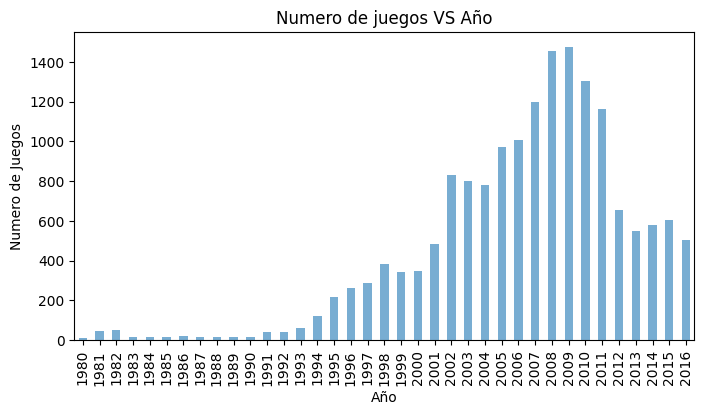

In [461]:

df_game.plot.bar(x = 'year_of_release', y = 'name', rot = 90, figsize = (8, 4), alpha = 0.6, legend = False)
plt.xlabel('Año')
plt.ylabel('Numero de Juegos')
plt.title("Numero de juegos VS Año");

Vemos que la industria de los videojuegos empieza desde el 1995 a crecer y su apogeo empieza en 2002 y alcanza su pico en 2009.

#### Ventas por Plataforma 
Observar cómo varían las ventas de una plataforma a otra. Elegir las plataformas con las mayores ventas totales y construir una distribución basada en los datos de cada año. 

In [462]:
df_sales = df_lab[['platform', 'total_sales']].groupby('platform').agg('count').sort_values('total_sales', ascending = False).reset_index()
df_sales.nlargest(5, 'total_sales')

,platform,total_sales
0,PS2,2159
1,DS,2151
2,PS3,1330
3,Wii,1320
4,X360,1262


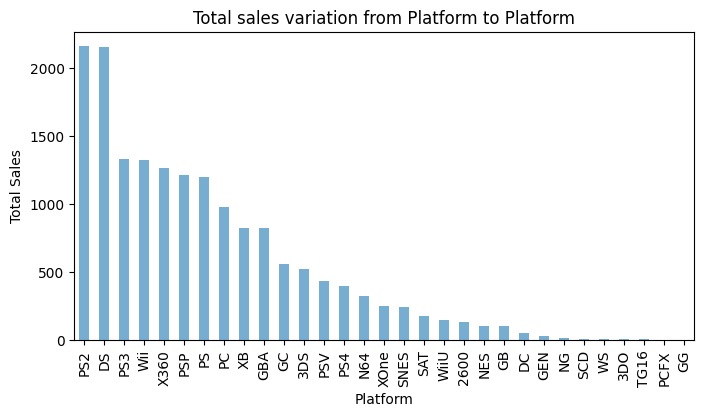

In [463]:
df_sales.plot.bar(x = 'platform', y = 'total_sales', rot = 90, figsize = (8, 4), alpha = 0.6, legend = False)
plt.xlabel('Platform')
plt.ylabel('Total Sales')
plt.title("Total sales variation from Platform to Platform");

> Observamos que las plataformas que mas han vendido son la PS2, DS, PS3 , Wii

Buscar las plataformas que eran populares pero que ahora no tienen ventas. Estimar cuánto tiempo tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer.

In [464]:
df_top = df_lab[df_lab.platform.isin(['PS2', 'DS', 'PS3', 'Wii', 'X360'])]
top5_sales = df_top.pivot_table(index = 'year_of_release', values= 'total_sales', columns = 'platform', aggfunc = 'sum')


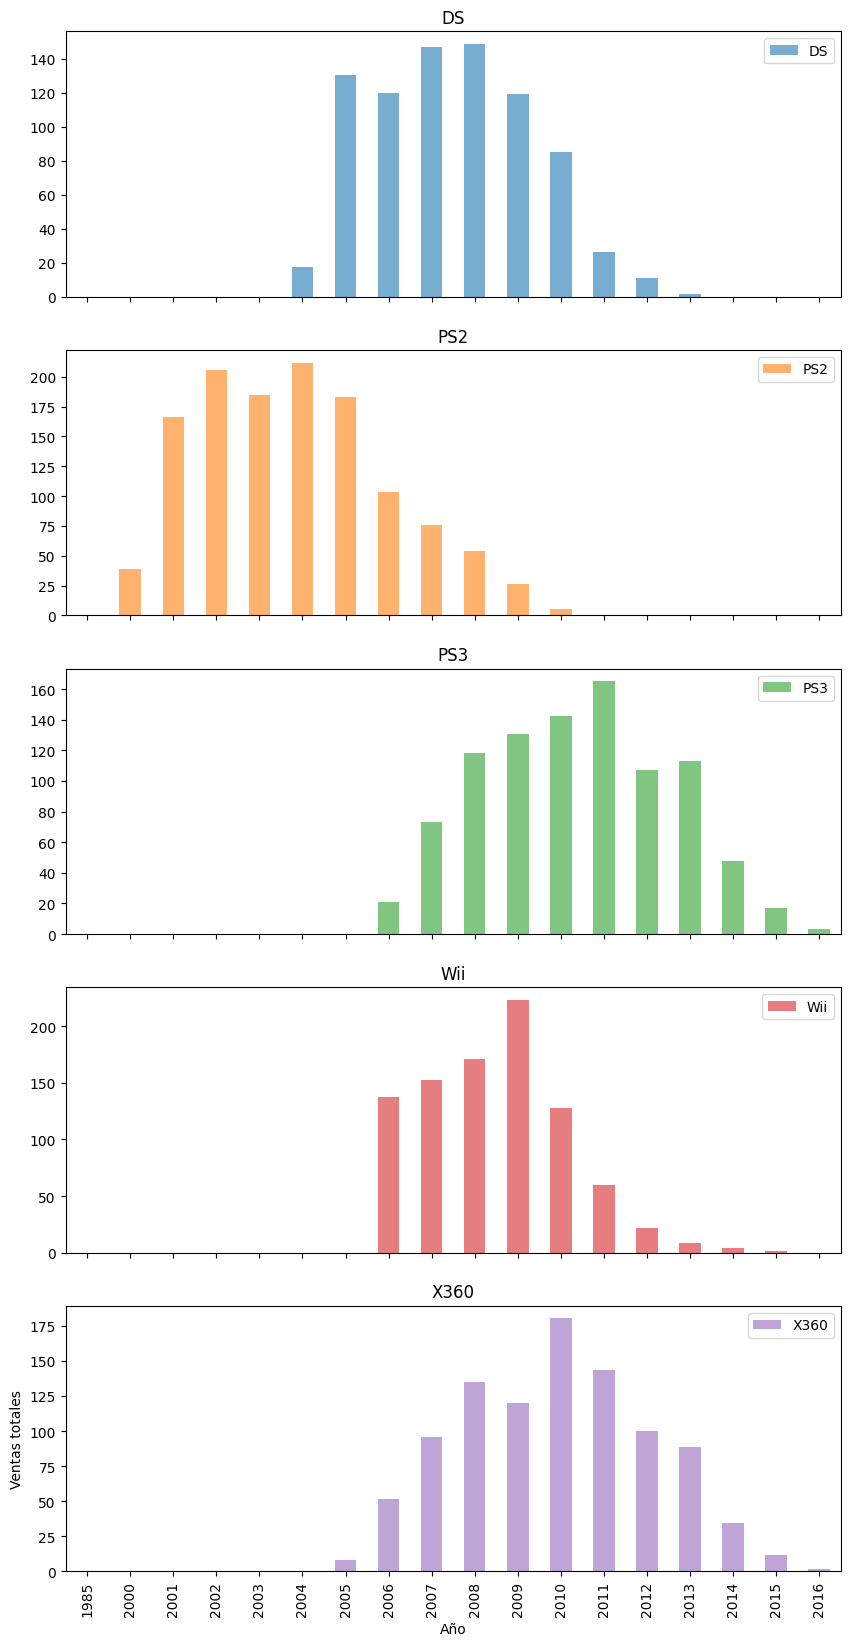

In [465]:
top5_sales.plot.bar(subplots=True, figsize=(10, 20), alpha = 0.6)
plt.suptitle("")
plt.xlabel('Año')
plt.ylabel('Ventas totales');

+ Determinar para qué período se deben tomar los datos. Considerar las respuestas a las preguntas anteriores. 

> Concluimos que las plataformas y sus juegos tienen un periodo de vida de entre 9 y 12 años aproximadamente. por lo tanto consideraremos el periodo de tiempo igual a 10 años .

+ Trabajar solo con los datos que se consideren relevantes. Ignorar los datos de años anteriores.

Concluimos que los valores relevantes seria los juegos que tengan un potencias de 10 años , apartir de 2017 le quitaremos 5 años lo que nos deja que solo se tomara en cuenta los juegos desde el año 2012 , lo que nos deja un analisis para los siguientes 5 años.

Filtramos el dataset para descartar los juegos anteriores de 2012.

In [466]:
print(df_lab_filtrado['year_of_release'])

0       2013
1       2013
2       2015
3       2013
4       2012
        ... 
2890    2016
2891    2014
2892    2016
2893    2016
2894    2016
Name: year_of_release, Length: 2895, dtype: int32


In [467]:
df_lab_filtrado=df_lab[df_lab['year_of_release']>=2012].reset_index(drop=True)

Vamos a tener los dato relevantes a partir de 2012

In [468]:
print(df_lab_filtrado['year_of_release'])

0       2013
1       2013
2       2015
3       2013
4       2012
        ... 
2890    2016
2891    2014
2892    2016
2893    2016
2894    2016
Name: year_of_release, Length: 2895, dtype: int32


#### Ventas Globales de Juegos
+ Crear un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma. Analizar si las diferencias en las ventas son significativas y qué sucede con las ventas promedio en varias plataformas. Describir los hallazgos.



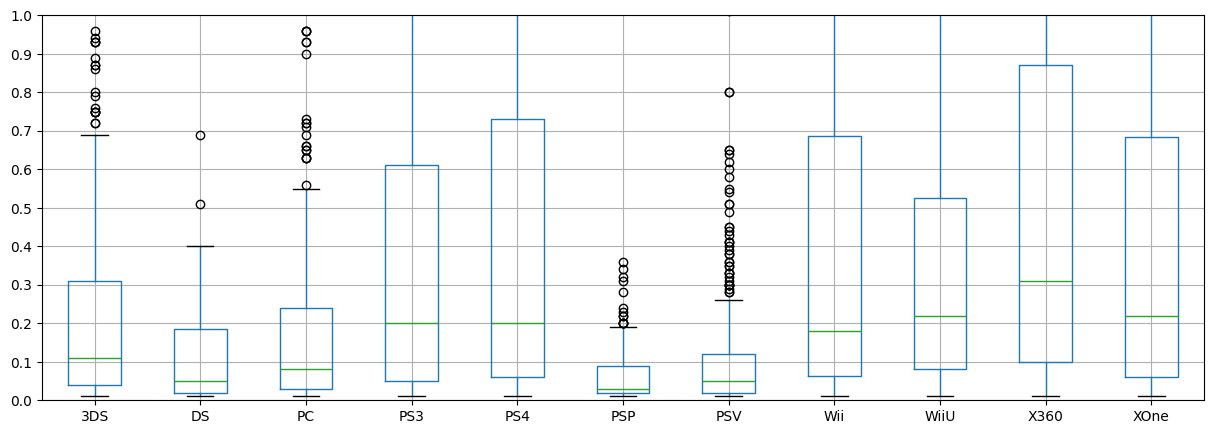

In [469]:
# Hagamos una tabla con las ventas
df_4_sales = df_lab_filtrado.pivot_table(index='name', columns='platform', values='total_sales', aggfunc='sum')

# Hagamos un enfoque para ver mejor estas cajas
df_4_sales.boxplot(figsize=(15,5))

plt.yticks(np.arange(0,1.1,0.1))
plt.ylim(0,1)
plt.show()

#### Reseñas de Usuarios
+ Investigar cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular. Crear un gráfico de dispersión y calcular la correlación entre las reseñas y las ventas. 

##### Rating

In [470]:

# Vemos como se distribuye por calificación
df_lab_ESRB=df_lab_filtrado.pivot_table(index='name', columns='rating', values='total_sales', aggfunc='sum')

df_lab_ESRB.describe()

rating,E,E10+,M,RP,T
count,186.000000,131.000000,216.000000,979.000000,245.000000
mean,1.544785,1.190687,2.361620,0.338274,0.666898
std,2.932520,1.854536,5.326225,1.513681,1.197021
min,0.010000,0.010000,0.020000,0.010000,0.010000
25%,0.110000,0.120000,0.207500,0.020000,0.110000
50%,0.500000,0.360000,0.775000,0.050000,0.240000
75%,1.477500,1.195000,2.227500,0.160000,0.660000
max,17.370000,8.900000,56.580000,25.670000,12.540000


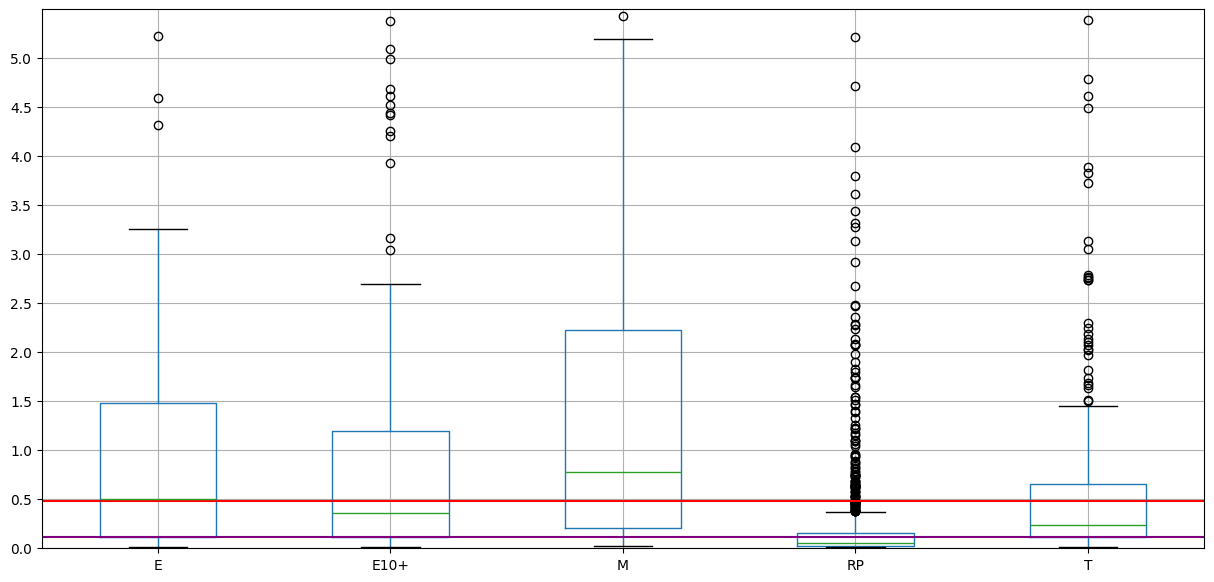

In [471]:
# Hagamos un zoom en nuestros diagramas de caja
df_lab_ESRB.boxplot(figsize=(15,7))
plt.ylim(0,5.5)
plt.yticks((np.arange(0, 5.5, step=0.5)))
# Marquemos la mediana en rojo
plt.hlines(0.48, xmin=0.5,xmax=5.5, color='red')
# Marquemos la media en morado
plt.hlines(0.11, xmin=0.5,xmax=5.5, color='purple')
plt.show()

> Se puede concluir que por calificacion ESRB la categoria que mas vende es la `M`

In [472]:
df_lab_userScore=df_lab_filtrado.pivot_table(index='name', columns='platform', values='user_score', aggfunc='sum')

df_lab_userScore.describe()

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
count,404.000000,31.000000,250.000000,492.000000,392.000000,173.000000,412.000000,54.000000,147.000000,292.000000,247.000000
mean,5.016832,4.451613,6.029200,5.755691,5.855357,4.524855,5.723058,5.340741,6.200000,5.828425,6.092713
std,2.841148,3.177826,2.057972,2.505714,2.467170,2.948041,2.730503,2.525606,2.203391,2.022344,2.089975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.300000,1.500000,4.800000,4.000000,4.900000,2.000000,4.000000,4.000000,5.000000,4.800000,5.400000
50%,6.000000,5.000000,6.500000,6.400000,6.600000,4.000000,6.750000,6.000000,6.800000,6.250000,6.600000
75%,7.400000,7.000000,7.600000,7.800000,7.725000,7.000000,8.000000,7.075000,7.950000,7.300000,7.550000
max,9.100000,9.000000,9.300000,11.000000,9.200000,9.000000,9.300000,9.000000,9.100000,9.000000,9.200000


In [473]:
best_quartile_userScore = df_lab_userScore.quantile(0.75)
best_quartile_userScore

platform
3DS     7.400
DS      7.000
PC      7.600
PS3     7.800
PS4     7.725
PSP     7.000
PSV     8.000
Wii     7.075
WiiU    7.950
X360    7.300
XOne    7.550
Name: 0.75, dtype: float64

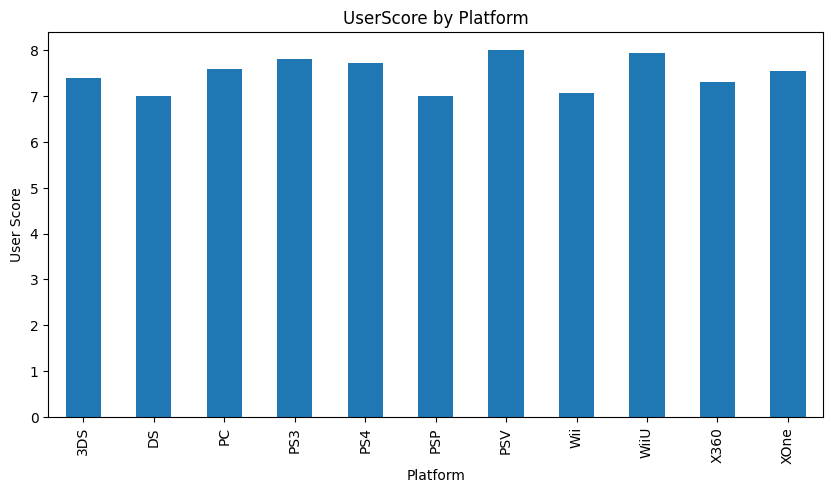

In [474]:
best_quartile_userScore.plot.bar(figsize=(10,5))


# Etiquetas y título
plt.xlabel('Platform')
plt.ylabel('User Score')
plt.title('UserScore by Platform')

# Mostrar el gráfico
plt.show()

Vamos a ver si es que hay correlacion

In [475]:
df_lab_filtrado['user_score'].corr(df_lab_filtrado['total_sales'])

0.07533064999746268

> Podemos ver que no necesariemente existe una correlacion entre el user score y las ventas.

#### Calidicacion de Criticos `critic_score`

In [476]:
df_lab_filtrado['critic_score'].describe()

count    2895.000000
mean       62.917444
std        22.087541
min        13.000000
25%        48.000000
50%        69.000000
75%        80.000000
max        97.000000
Name: critic_score, dtype: float64

In [477]:
df_lab_cscore = df_lab_filtrado.pivot_table(index='name', columns='platform', values='critic_score', aggfunc='sum')

df_lab_cscore.describe()

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
count,404.000000,31.000000,250.000000,492.000000,392.000000,173.000000,412.000000,54.000000,147.000000,292.000000,247.00000
mean,60.559406,53.870968,71.840000,61.654472,65.875000,54.526012,60.004854,58.592593,63.176871,64.123288,67.05668
std,22.803921,22.299091,15.765042,23.175117,19.915864,25.301339,23.683435,25.673949,21.374258,20.633903,20.17134
min,13.000000,18.000000,15.000000,13.000000,13.000000,13.000000,13.000000,14.000000,13.000000,14.000000,13.00000
25%,44.000000,37.000000,65.000000,44.000000,54.000000,32.000000,40.000000,36.000000,49.000000,49.750000,60.00000
50%,65.000000,54.000000,75.500000,68.000000,71.000000,55.000000,64.000000,64.500000,69.000000,69.000000,73.00000
75%,79.250000,70.000000,82.000000,79.000000,80.000000,75.000000,79.000000,80.250000,79.000000,80.000000,81.00000
max,97.000000,93.000000,97.000000,166.000000,97.000000,97.000000,97.000000,97.000000,96.000000,97.000000,97.00000


Vemos si es que hay correlacion 

In [478]:
df_lab_filtrado['critic_score'].corr(df_lab_filtrado['total_sales'])

0.17305298535768682

> Concluimos que es demasiado baja la relacion de entre la critica y el juego con las ventas.

Juegos Vs Plataformas
+ Comparar las ventas de los mismos juegos en otras plataformas, teniendo en cuenta las conclusiones.
En este caso Vamos a tomar los mejores Juegos analizados en diferentes plataformas. 

In [479]:
df_lab_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2895 entries, 0 to 2894
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2895 non-null   object 
 1   platform         2895 non-null   object 
 2   year_of_release  2895 non-null   int32  
 3   genre            2895 non-null   object 
 4   na_sales         2895 non-null   float64
 5   eu_sales         2895 non-null   float64
 6   jp_sales         2895 non-null   float64
 7   other_sales      2895 non-null   float64
 8   critic_score     2895 non-null   float64
 9   user_score       2895 non-null   float64
 10  rating           2895 non-null   object 
 11  total_sales      2895 non-null   float64
dtypes: float64(7), int32(1), object(4)
memory usage: 260.2+ KB


In [480]:
df_grouped_best_games = df_lab_filtrado.groupby(['name', 'platform'])['total_sales'].sum()


In [481]:
# Ordenar la Serie de forma descendente
df_grouped_best_games_sorted = df_grouped_best_games.sort_values(ascending=False)


In [482]:
df_grouped_best_games_sorted



name                                            platform
Grand Theft Auto V                              PS3         21.05
                                                X360        16.27
Call of Duty: Black Ops 3                       PS4         14.63
Pokemon X/Pokemon Y                             3DS         14.60
Call of Duty: Black Ops II                      PS3         13.79
                                                            ...  
SoniPro                                         3DS          0.01
Horse Life 4: My Horse, My Friend, My Champion  3DS          0.01
Hyakka Yakou                                    PSV          0.01
Hyakki Yagyou Kaidan Romance                    PSP          0.01
Mark McMorris Infinite Air                      XOne         0.01
Name: total_sales, Length: 2894, dtype: float64

In [483]:
top_games=df_grouped_best_games_sorted.head(20)

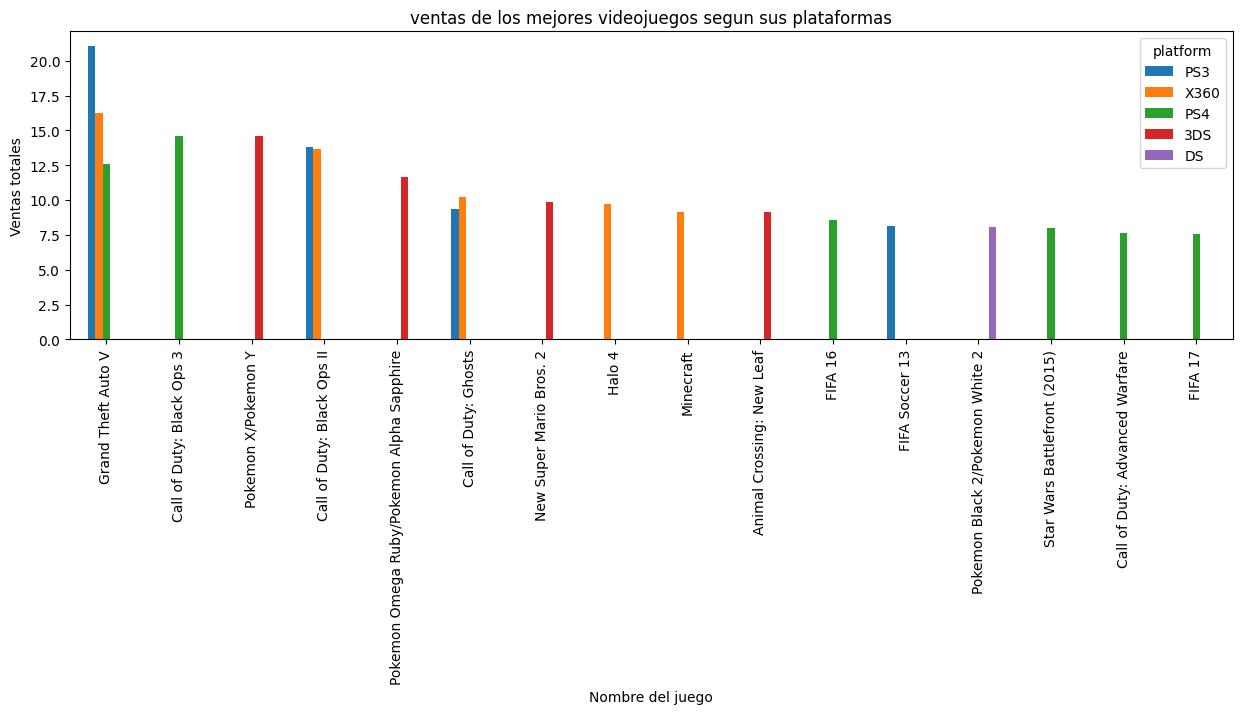

In [484]:
# Deshacer el índice 'platform'
df_unstacked = top_games.unstack('platform')

# Crear el gráfico de barras
df_unstacked.plot(kind='bar', figsize=(15,4))

plt.xlabel('Nombre del juego')
plt.ylabel('Ventas totales')
plt.title('ventas de los mejores videojuegos segun sus plataformas')

# Mostrar el gráfico
plt.show()


> Podemos Observar que los juegos mas Vendidos que estan en diferentes plataformas tiene una correlacion.
En este caso se ve que las plataformas que mas venden videojuegos son a consolas por lo que hay que enfocarse en las mismas

> Entre ellas destaca "Grand Theft Auto V"

#### Rentabilidad por Genero

+ Echar un vistazo a la distribución general de los juegos por género. Analizar los géneros más rentables y tratar de generalizar acerca de los géneros con ventas altas y bajas.

In [485]:
df_grouped_best_genre = df_lab_filtrado.groupby(['genre'])['total_sales'].sum()
df_grouped_best_genre

genre
Action          441.52
Adventure        29.52
Fighting         44.49
Misc             85.04
Platform         61.00
Puzzle            4.89
Racing           53.59
Role-Playing    193.09
Shooter         304.80
Simulation       35.61
Sports          181.09
Strategy         13.34
Name: total_sales, dtype: float64

In [486]:
df_grouped_best_genre = df_grouped_best_genre.sort_values(ascending=False)

Los mejores Juegos:

In [487]:
df_grouped_best_genre

genre
Action          441.52
Shooter         304.80
Role-Playing    193.09
Sports          181.09
Misc             85.04
Platform         61.00
Racing           53.59
Fighting         44.49
Simulation       35.61
Adventure        29.52
Strategy         13.34
Puzzle            4.89
Name: total_sales, dtype: float64

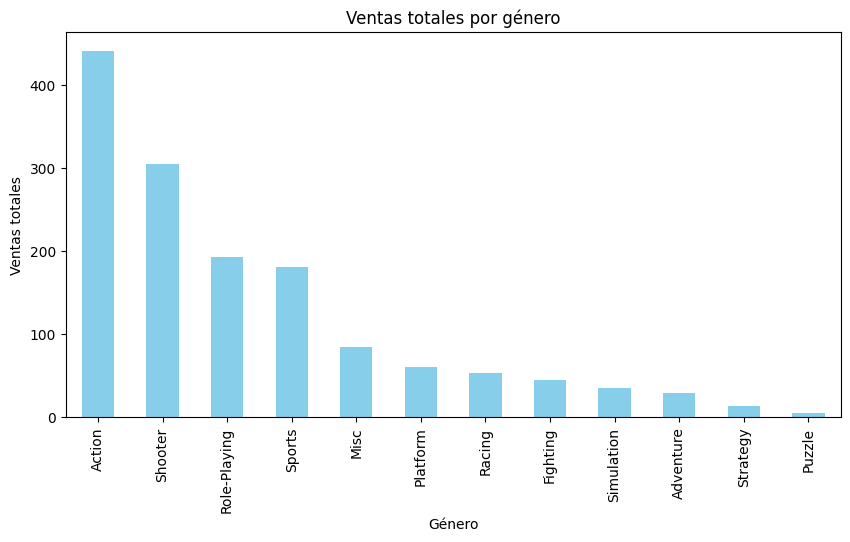

In [488]:

# Crear el gráfico de barras
df_grouped_best_genre.plot(kind='bar', color='skyblue', figsize=(10,5))

# Agregar nombres a los ejes
plt.xlabel('Género')
plt.ylabel('Ventas totales')

# Agregar título al gráfico
plt.title('Ventas totales por género')

# Mostrar el gráfico
plt.show()


> Podemos concluir que si hay una relacion entre el genero y las ventas del Juego, donde hay que procurar hacer videojuegos de Accion y shooter.

###  Evaluar por Regiones <a class="anchor" id="evaluarRegiones"></a> 

Para cada región (NA, UE, JP)


+ Las cinco plataformas principales. 
+ Describir las variaciones en sus cuotas de mercado de una región a otra.
+ Los cinco géneros principales. Explicar la diferencia.


#### Comparacion de Regiones en plataforma

In [489]:
df_grouped_region_platform= df_lab_filtrado.groupby('platform')[['na_sales','eu_sales','jp_sales']].sum()
# Ordenar el DataFrame de forma descendente por 'na_sales'
df_grouped_region_platform = df_grouped_region_platform.sort_values('na_sales', ascending=False)

df_grouped_region_platform 

,na_sales,eu_sales,jp_sales
platform,,,
X360,140.05,74.52,1.57
PS4,108.74,141.09,15.96
PS3,103.38,106.86,35.29
XOne,93.12,51.59,0.34
3DS,56.15,42.85,87.84
WiiU,38.10,25.13,13.01
PC,19.12,37.76,0.00
Wii,17.45,11.92,3.39
PSV,11.09,11.41,21.11


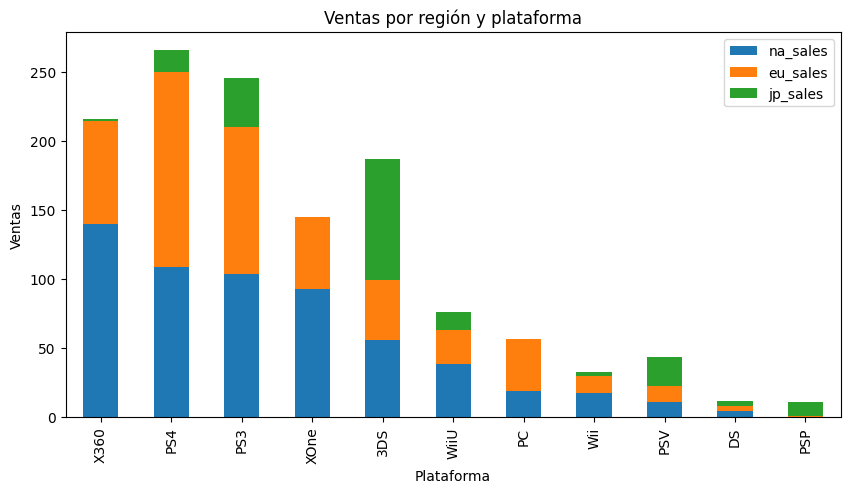

In [490]:
#Crear el gráfico de barras
df_grouped_region_platform.plot(kind='bar', stacked=True, figsize=(10,5))

# Agregar nombres a los ejes
plt.xlabel('Plataforma')
plt.ylabel('Ventas')

# Agregar título al gráfico
plt.title('Ventas por región y plataforma')

# Mostrar el gráfico
plt.show()

__Conclusión en las Plataformas:__
+ NA: Vemos el las plataformas de consolas son las mas importantes, como la X360 y PS4. 
+ EU: Igual se acerca a los juegos de consola pero mas de sony, como la PS4.
+ JP: Tiene mejor afinidad por plataformas Portables como el 3DS.

#### Comparacion de Regiones por Genero

In [491]:
df_grouped_region_genre= df_lab_filtrado.groupby('genre')[['na_sales','eu_sales','jp_sales']].sum()
df_grouped_region_genre = df_grouped_region_genre.sort_values('na_sales', ascending=False)
df_grouped_region_genre 

,na_sales,eu_sales,jp_sales
genre,,,
Action,178.02,159.53,52.80
Shooter,144.81,113.49,9.23
Sports,81.53,69.09,8.03
Role-Playing,64.11,48.58,65.54
Misc,38.19,26.32,12.86
Platform,25.38,21.41,8.63
Fighting,19.79,10.79,9.44
Racing,17.30,27.29,2.50
Adventure,9.00,9.46,8.24


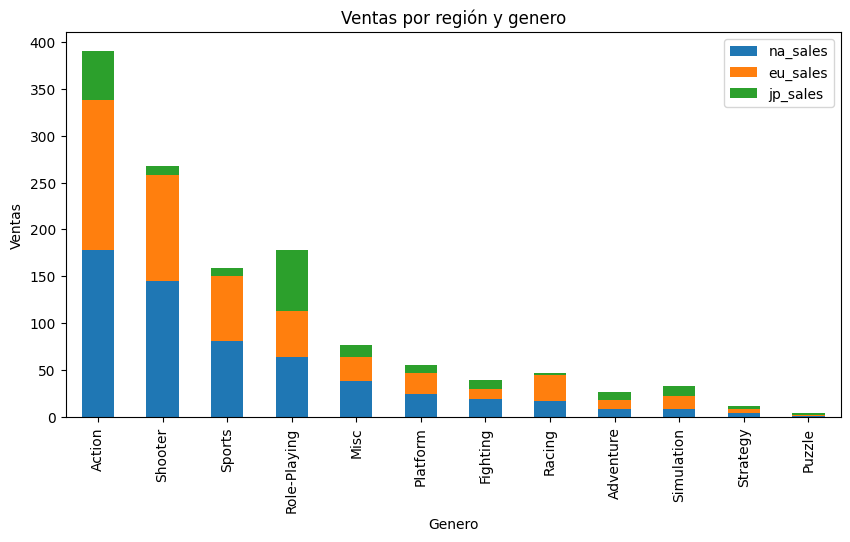

In [492]:
#Crear el gráfico de barras
df_grouped_region_genre.plot(kind='bar', stacked=True, figsize=(10,5))

# Agregar nombres a los ejes
plt.xlabel('Genero')
plt.ylabel('Ventas')

# Agregar título al gráfico
plt.title('Ventas por región y genero')

# Mostrar el gráfico
plt.show()

__Conclusión en el Género:__
+ NA: Vemos que el comportamiento se acerca mas a los juegos de acción y disparos.
+ EU: También se  acerca más a los juegos de accion y disparos.
+ JP: Son más propensos a los juegos de Rol

#### Calificacion ESRB entre regiones
+ Si las clasificaciones de ESRB afectan a las ventas en regiones individuales.

In [493]:
df_grouped_region_ESRB= df_lab_filtrado.groupby('rating')[['na_sales','eu_sales','jp_sales']].sum()
df_grouped_region_ESRB = df_grouped_region_ESRB.sort_values('na_sales', ascending=False)
df_grouped_region_ESRB 

,na_sales,eu_sales,jp_sales
rating,,,
M,231.57,193.96,21.20
E,114.49,113.05,28.33
RP,103.59,91.50,108.89
E10+,75.96,55.56,8.19
T,66.31,53.01,26.09


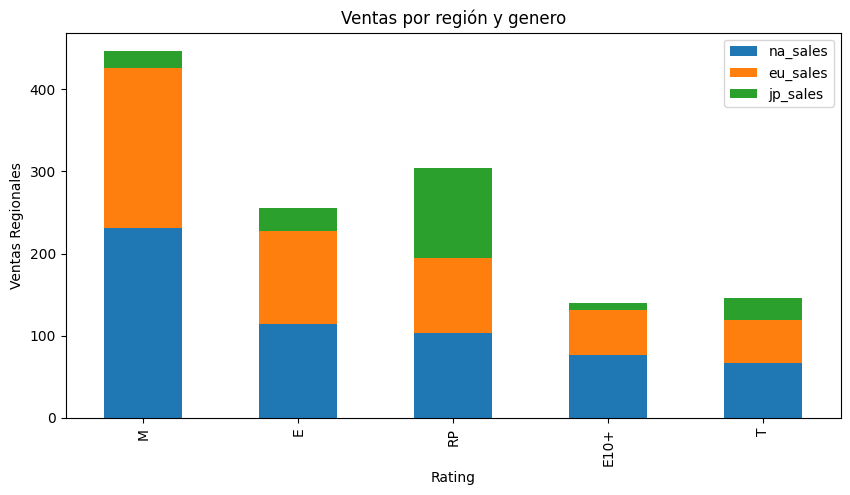

In [494]:
#Crear el gráfico de barras
df_grouped_region_ESRB.plot(kind='bar', stacked=True, figsize=(10,5))

# Agregar nombres a los ejes
plt.xlabel('Rating')
plt.ylabel('Ventas Regionales')

# Agregar título al gráfico
plt.title('Ventas por región y genero')

# Mostrar el gráfico
plt.show()

__Conclusión en el Rating:__
+ NA: Vemos que la clasificacion de Rating mas jugada es la M para publico maduro aunque la segunda es para todo Publica.
+ EU: Se comporta igual que la Region NA, pero en otras clasificaciones tiene mas presencia.
+ JP: La mejor clasificacion es la de RP , con ratin sin categoria especifica, puede deberse a que sacan nuevos generos pocos conocidos a nivel mundial.

#### Conclusion General
Podemos apreciar que las regiones NA y EU , son parecidas en comportamiento y gustos dentro de los videojuegos.
En Cambio JP difiere significativamente en algunas categorias , puede ser por la cultura y su afinidad por la fantasia y juegos de rol.

## Prueba de Hipótesis <a class="anchor" id="hipotesis"></a>

Dentro de nuestro proyecto debemos probar 2 hipótesis
* Caso 1: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.
* caso2 : Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

En cada caso vamos a escoger el grado de significancia del 5%.

### Caso 1: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

Hipótesis nula: Las calificaciones promedio son las mismas.

In [495]:
# Fijamos el valor de alpha
alpha = 0.05

# Fijamos las muestras
sample1 = df_lab_filtrado[df_lab_filtrado['platform']=='XOne']['user_score']
sample2 = df_lab_filtrado[df_lab_filtrado['platform']=='PC']['user_score']

# Realizamos el test
results = st.ttest_ind(sample1, sample2)

# Vemos el resultado
print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Rechazamos la hipótesis nula, las calificaciones promedio son diferentes.')
else:
    print('No rechazamos la hipótesis nula, las calificaciones promedio son iguales.')


p-value: 0.7329825233236501
No rechazamos la hipótesis nula, las calificaciones promedio son iguales.


> El valor p que tenemos es muy cercano al valor de alpha, lo que sugiere que se podrían obtener resultados más definitivos con estudios adicionales. Sin embargo, por el momento, nos quedamos con los resultados actuales. No descartamos la hipótesis nula y confirmamos la hipótesis 1.

### Caso 2: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.
Hipótesis nula: Las calificaciones promedio son las mismas.

In [496]:
# Fijamos el valor de alpha
alpha = 0.05

# Fijamos las muestras
sample1 = df_lab_filtrado[df_lab_filtrado['genre']=='Action']['user_score']
sample2 = df_lab_filtrado[df_lab_filtrado['genre']=='Sports']['user_score']

# Realizamos el test
results = st.ttest_ind(sample1, sample2)

# Vemos el resultado
print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Rechazamos la hipótesis nula, las calificaciones promedio son diferentes.')
else:
    print('No rechazamos la hipótesis nula, las calificaciones promedio son iguales.')


p-value: 5.6950363372868215e-05
Rechazamos la hipótesis nula, las calificaciones promedio son diferentes.


## Conclusión  <a class="anchor" id="conclusion"></a>


__Problema:__ El objetivo del proyecto es analizar los datos de ventas de juegos en diferentes zonas y plataformas, y encontrar las mejores estrategias para lanzar una nueva campaña publicitaria en el año 2017.

__Proceso de Solución:__ Se realizó un preprocesamiento de los datos para corregir los errores de formato y los datos vacíos, y se exploró la relación entre las ventas y diversos factores como el género, la plataforma, la calificación y la zona geográfica.

Se ha analizado el los datos en relacion a los juegos y se obtuvo la siguiente informacion:



+ Se encontró que las plataformas tienen una vida útil promedio de 10 años. 
+ Las calificaciones no influyen en las ventas (calificacionde Rating, usuario y criticos).
+ Hay géneros más populares que otros y se refleja en las ventas.
+ Existe diferencias entre las preferencias de las zonas de Norte América, Europa y Japón, pero la que mas difiere es Japon.

Recomendaciones: 

    - Se sugirió considerar la zona de lanzamiento, la plataforma y el género más adecuados para la nueva campaña
    - La posibilidad de crear y lanzar una nueva plataforma para aprovechar el vacío que dejarán las plataformas existentes. 
    - Se mencionó que los juegos exitosos suelen ser parte de una saga o tener mecánicas innovadoras.
    - Segmentar por Regiones y generos para algo mas especifico atinando al publico adulto.